In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Bank_Customer_retirement.csv")

In [3]:
data.head()


,Customer ID,Age,Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [5]:
# dropping the customer id
data.drop("Customer ID", axis=1, inplace=True)

In [7]:
data

,Age,Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1
...,...,...,...
495,46.678128,704243.0776,1
496,43.545007,483175.9998,0
497,46.476724,354919.1987,0
498,50.903631,639789.9219,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      500 non-null    float64
 1   Savings  500 non-null    float64
 2   Retire   500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


<function matplotlib.pyplot.show(close=None, block=None)>

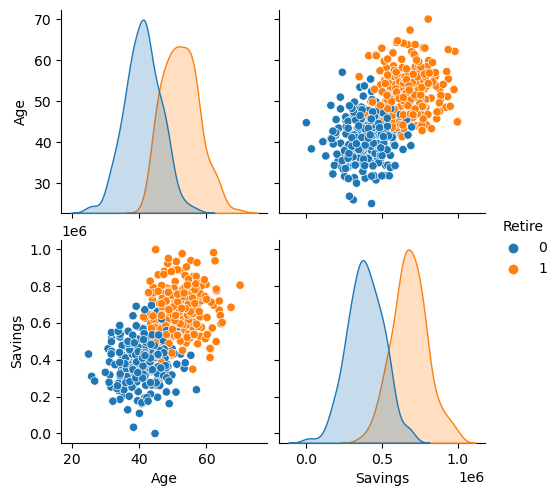

In [9]:
#EDA-visualization
#pair plot
sns.pairplot(data,hue='Retire',vars=['Age','Savings'])
plt.show


In [10]:
data['Retire'].value_counts()

0    250
1    250
Name: Retire, dtype: int64

In [13]:
#splitting the data into the feature set and dependent variable
x=data.drop(['Retire'],axis=1)
y=data['Retire']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

In [17]:
#Support vector machine

In [19]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train,y_train)

SVC()

In [23]:
#evaluating the model:
from sklearn.metrics import classification_report,confusion_matrix
y_predict=svm_model.predict(x_test)
cm= confusion_matrix(y_test,y_predict)

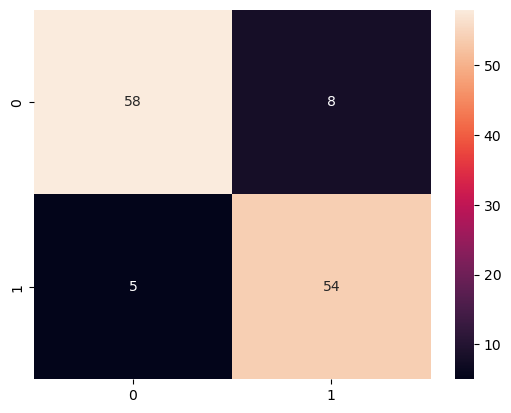

In [24]:
#visualization the cm
sns.heatmap(cm,annot=True)
plt.show()

In [27]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        66
           1       0.87      0.92      0.89        59

    accuracy                           0.90       125
   macro avg       0.90      0.90      0.90       125
weighted avg       0.90      0.90      0.90       125



In [28]:
# improve the model using feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [33]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train,y_train)

SVC()

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=svc_model.predict(x_test)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        66
           1       0.93      0.95      0.94        59

    accuracy                           0.94       125
   macro avg       0.94      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125



In [ ]:
#improve the model using 